In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [13]:
# Initializing the data
points = {0: [(3,4),(4,5),(7,3), (3,6), (5,3)],
          1: [(-3,-4), (-4, -2), (-3,-8), (-5,-6), (-3,-3), (-3,-2)] }

# Dominos ordered pairs
X_dominos = [i[0] for i in points[0]]
Y_dominos = [i[1] for i in points[0]]
dominos= [X_dominos, Y_dominos]

# Pizza Hut ordered pairs
X_phut = [i[0] for i in points[1]]
Y_phut = [i[1] for i in points[1]]
phut = [X_phut, Y_phut]

data = {'dominos':dominos, 'phut':phut, 'points':points} # Put all data into one dictionary

In [14]:
# Set the value of the new point to check the class of
new_point = (-2, -6)

In [15]:
# Set the value of "k". Number of nearest neighbours
k = 3

In [19]:
def new_point_class(new_point, data, k=3, classifier='mode'):
  results = [] # Initialize results list
  #print('(Distance, Class) pair')
  for Class in (data['points']): # Iterate through every class
    for p in data['points'][Class]: # Iterate through each point in selected class
      dist = abs(p[0] - new_point[0]) + abs(p[1] - new_point[1]) # Calculate the manhattan distance from point to new point
      #print(dist, Class)
      results.append([dist,Class]) # Append [manhatten distance, Class] pair to the results list

  results.sort() # Sort the distances to each point from least to greatest

  k_nearest = results[:k] # Assign the k nearest neighbours (distance, class) to the k_nearest variable
  k_nearest

  if classifier == 'mode': # Uses the mode class of the k nearest neighbours to classify the new point
    second_numbers = [pair[1] for pair in k_nearest] # Extract the second number (class) from each pair

    cl = mode(second_numbers) # Calculate the mode of the second numbers (Mode of the class of the K nearest neighbours)
    #print(cl)
    if cl == 0:
        print(f'The mode of {k} nearest neighbours is {cl}. The new point belongs to the Dominos class.')
        return 'Dominos'
    elif cl == 1:
        print(f'The mode of {k} nearest neighbours is {cl}. The new point belongs to the Pizza Hut class.')
        return 'Pizza Hut'

  elif classifier == 'sum': # Uses the sum of the binary class representation of the k nearest neighbours to classify the new point
    sum = 0
    for i in range(len(k_nearest)):
      sum = sum+k_nearest[i][1]
    print(f'The sum of the nearest neighbours classes is: {sum}')
    if sum > (k/2): # If the sum is greater than half the value of k, the class must be '1'
      return 'Pizza Hut'
    else:
      return 'Dominos'

In [17]:
print( new_point_class(new_point, data, k, classifier='mode') )
print( new_point_class(new_point, data, k, classifier='sum') )

The mode of 3 nearest neighbours is 1. The new point belongs to the Pizza Hut class.
Pizza Hut
The sum of the nearest neighbours classes is: 3
Pizza Hut


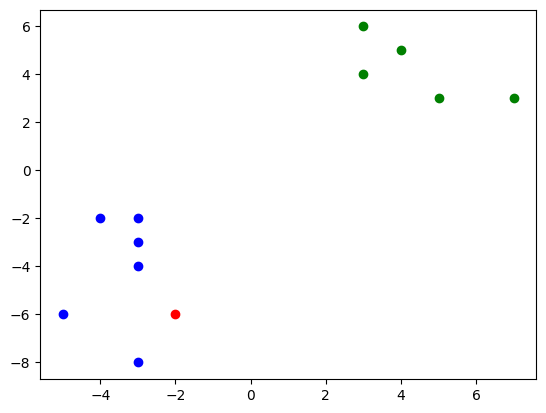

In [18]:
plt.scatter(X_dominos, Y_dominos, c='g')
plt.scatter(X_phut, Y_phut, c='b')
plt.scatter(new_point[0], new_point[1], c='r')